In [64]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

# SVMs

## Overview
---
Draw a line to separate the data (linear seperable data).  Lines to close to data may overfit.  Line in middle best fits data without overcommitting to it.   

Want the line that is consistant with the data while committing least to it.  Have a line that leaves as much space as possible between boundaries - maximum margin.

When considering a line to separate two groups of data in a 2D plane (i.e., a group in the lower left and another in the upper right) we would want to consider the line the best performs a separation of the two groups, a *decision boundary*, all while committing as little as possible to either group.

<img src="../images/svm.jpeg" width=550 align="left"/>  
<img src="../images/svm.png" width=400 align="right"/>  

## Decision Boundary and Margin  
---
Normal equation for a line:  $y=w^Tx+b$   

For the case with hyperplanes, a linear classifier can be defined as:   
$y=w^Tx+b$   

where:
- $w$ are the parameters of the plane   
- $b$ moves it in and out of the origin  
- $y$ is the classification label (-1 not in class, 1 in class)  

Taking a new point and projecting it onto a line and looking at the value that comes out from projecting it.


For the **decision boundary** the equation is expressed as:  
$w^Tx+b=0$


For the lines that get close to the data can be expressed as:  
For line that gets close to positive examples (+1 on very first point that it encounters)   
$w^Tx+b=1$   

For line that gets close to negative examples (-1 on very first point that it encounters)  
$w^Tx+b=-1$   


Want the vector between those to line to be maximized (maximum margin)  
In order to maximize the the distance between these two hyperplanes, we subtract the two equations above, as:  

$
\frac{w^T(x_1 - x_2)}{\left\Vert w \right\Vert
} = \frac{ 2 }{\left\Vert w \right\Vert}
$

The margin is defined as:   
$m = \frac{ 2 }{\left\Vert w \right\Vert}$  

<img src="../images/svm_margin.png" width=600 align="left"/>  

The goal of support vector machines is to maximize the margin,  $m$, subject to the constraint that we classify everything correctly.   
Defined mathematically as:    
$\textrm{max}(m) : y_i (w^T X_i +b) \ge 1 \; \forall_i$

Mathematically this is equivalent to:   
$\textrm{min} \left ( \frac{1}{2} \left\Vert w \right\Vert ^2 \right )~$  

Which can now be expressed in a form of a quadratic equation and solved with quadratic programming (special case of optimization problems).   

$
W( \alpha ) = \sum_i \alpha_i 
-\frac{1}{2} \sum_{ij} \alpha_i \alpha_j y_i y_j x_i^\textrm{T}x_j \\
\textrm{s.t.}: \alpha_i >= 0, \sum_i \alpha_i y_i = 0
$

Finally, to get $w$ (using $\alpha$'s that maximized $W(\alpha)$):   
- $ w = \sum_i \alpha_i y_i x_i $
- $\alpha_i $ are mostly 0 $\rightarrow$ only a few of $x_i$ matter (points far from the decsion boundary will be 0).
- $x_i^\textrm{T}x_j$ is a dot product (projection of one onto the other) representing similarity.   

$\alpha_i \alpha_j$ - which pairs of points matter for making decsion boundary   
$y_i y_j$ - how they relate to one another in terms of output labels   
$x_i^\textrm{T}x_j$ - with respect to how similar they are to one another

Like kNN because only local points matter.  Does some work in figuring out which points matter and keep them, doesn't keep them all.   

## Kernel Trick (Dealing With Linearity)
---
<img src="../images/svm_kernel_trick.png" width=600 align="left"/>  
In this example change the definition of *similar* to in or out of circle.   

Transform data to dimension higher so in this case circles are projected onto a sphere.   

This way points can be linear separated with a hyperplane (+'s moved up, -'s moved back).  

Consider some plane of points, of two types, $x$ and $y$, where the $x$'s surround the $y$'s, with coordinates $(x_1, x_2)$ and $(y_1, y_2)$, respectively. Consider a general transformation of a point, $q$, with coordinates, $(q_1, q_2)$.

$$ \Phi (q) = < q_1^2, q_2^2,  \sqrt{2} q_1 q_2 > $$

This representation of $q$ contains no additional information, per se, however, now allows possibilities for separating the data linearly along the additional dimension represented in coordinate $ \sqrt{2} q_1 q_2 $. 

We consider the above in the following: given the above, find the solution to:

\begin{equation}
\begin{split}
 \Phi (x)^\textrm{T}  \Phi (y) & = \\
 & = \left [x_1^2, x_2^2,  \sqrt{2} x_1 x_2 \right ]^\textrm{T} \left [ y _1^2, y_2^2,  \sqrt{2} y_1 y_2 \right ] \\
 & = x_1^2 y_1^2 + 2 x_1 x_2 y_1 y_2 + x_2^2 y_2^2 \\
 & = ( x_1 y_1 + x_2 y_2 ) ^ 2 \\
 & = ( x^ \textrm{T} y ) ^ 2
 \end{split}
 \end{equation}

What we observe is a *kernel trick*, demonstrating that the transformation of the original 2D data to the higher dimension can be computed in the *implicit feature space*, never requiring  computations on the coordinates to the transformed space. This is typically much more computationally efficient, and therefore desirable for learning endeavors.

## More Kernels
---

Kernels can be anything (captures domain knowledge, what is similarity).  
Mechanism by which we inject domain knowledge into the SVM learning algorithm.  
Project points into higher dimensional space to make them linearly separable.  
By using kernel function we don't actually have to do compution of transforming into higher dimensional space.

$
W( \alpha ) = \sum_i \alpha_i 
-\frac{1}{2} \sum_{ij} \alpha_i \alpha_j y_i y_j {K(x_i,x_j)}
$


Examples:  
$K =  (x^T y)^2$  
$K =  (x^T y)^2$   
$K =  (x^T y + c)^P$, a polynomial   
$K = e^{- \frac{1}{2 \sigma^2} || x-y ||^2}$, a radial basis function (guassian)  
$K = \tanh( \alpha x^T y + \Theta)$   

**Mercer Condition**  
Technical rquirement for kernel function (for math to work).  Acts like a distance or acts like a similarity.  For example a well behaved distance function.
TODO better define

## Summary
---
- margins: generalization & overfitting
- maximizing margins: bigger is better (larger margins tend minimize overfitting)  
- optimization problem for finding max margins: quadratic programming
- support vectors: the points from the input data that are most important for defining the maximum margin separator
- Kernel trick, $x^Ty$ can be represented by $ K(x, y) $, $ \rightarrow $ domain knowledge
- Eager lazy learner

In [93]:
def get_circle_points(r=10):
    x_top = np.linspace(-r, r, num=5000)
    y_top = np.sqrt(r**2 - x_top**2)
    x_bot = np.linspace(-r, r, num=5000)
    y_bot = -np.sqrt(r**2 - x_bot**2)
    
    x = np.concatenate((x_top, x_bot))
    y = np.concatenate((y_top, y_bot))

    return x, y

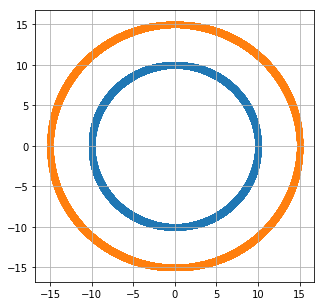

In [94]:
x1, y1 = get_circle_points(10)
x2, y2 = get_circle_points(15)

plt.figure(figsize=(5,5))
plt.grid()
plt.scatter(x1, y1)
plt.scatter(x2, y2)
plt.show()

In [95]:
def project_to_sphere(x, y):
    q_x = x**2
    q_y = y**2
    q_z = x*y*np.sqrt(2)
    return q_x, q_y, q_z

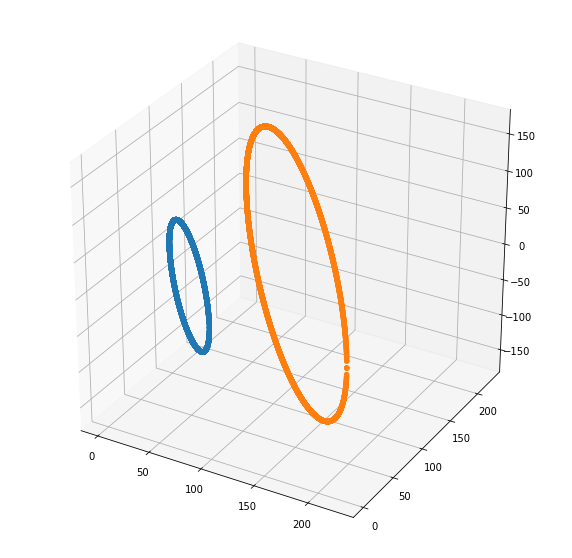

In [83]:
qx1, qy1, qz1 = project_to_sphere(x1, y1)
qx2, qy2, qz2 = project_to_sphere(x2, y2)

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(qx1, qy1, qz1);
ax.scatter3D(qx2, qy2, qz2);

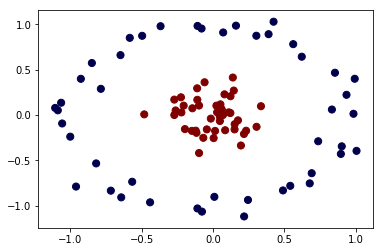

In [101]:
# https://towardsdatascience.com/understanding-support-vector-machine-part-2-kernel-trick-mercers-theorem-e1e6848c6c4d
from sklearn.datasets.samples_generator import make_circles
X,y = make_circles(90, factor=0.2, noise=0.1) 
#noise = standard deviation of Gaussian noise added in data. 
#factor = scale factor between the two circles

plt.scatter(X[:,0],X[:,1], c=y, s=50, cmap='seismic')
plt.show()

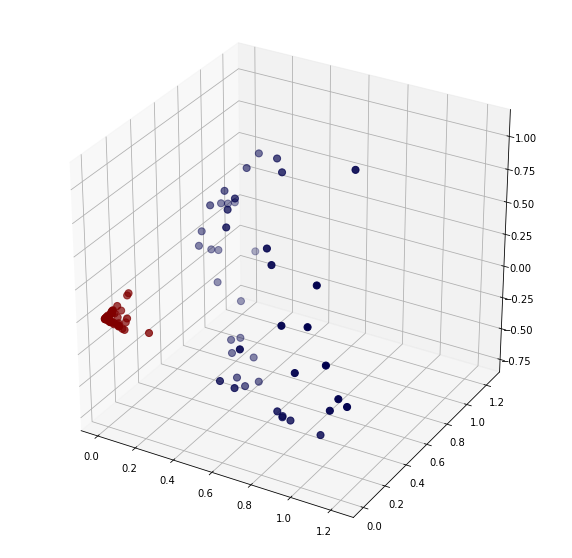

In [127]:
l,m,n = project_to_sphere(X[:,0],X[:,1])
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(l, m, n, c=y, s=50, cmap='seismic');
plt.show()